<a href="https://colab.research.google.com/github/raguram/eva/blob/master/S7/CIFAR10_Assignment7_withLibrary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount the drive and load required modules

In [1]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT, force_remount=True)

LIBRARY_ROOT = "/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/"

from importlib.machinery import SourceFileLoader

SourceFileLoader('Utility', join(LIBRARY_ROOT, 'Utility.py')).load_module()
SourceFileLoader('DataUtility', join(LIBRARY_ROOT, 'DataUtility.py')).load_module()
SourceFileLoader('CIFAR10Net', join(LIBRARY_ROOT, 'CIFAR10Net.py')).load_module()
SourceFileLoader('MetricsUtility', join(LIBRARY_ROOT, 'MetricsUtility.py')).load_module()
SourceFileLoader('ModelBuilder', join(LIBRARY_ROOT, 'ModelBuilder.py')).load_module()
SourceFileLoader('LossFunctionUtility', join(LIBRARY_ROOT, 'LossFunctionUtility.py')).load_module()

print("Loaded the required modules")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Loaded the required modules


In [0]:
from torchvision import datasets, transforms
from ModelBuilder import ModelTester
import torch
import Utility 
import DataUtility
from CIFAR10Net import CIFAR10Net as Net
import MetricsUtility
import ModelBuilder
from LossFunctionUtility import LossFn
import torch.nn.functional as F
import torch.optim as optim
from ModelBuilder import ModelBuilder

### Load the data and perform required transformations


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified
Shape of a train data batch: torch.Size([128, 3, 32, 32])
Shape of a test data batch: torch.Size([128, 3, 32, 32])
Number of train images: 50000
Number of test images: 10000


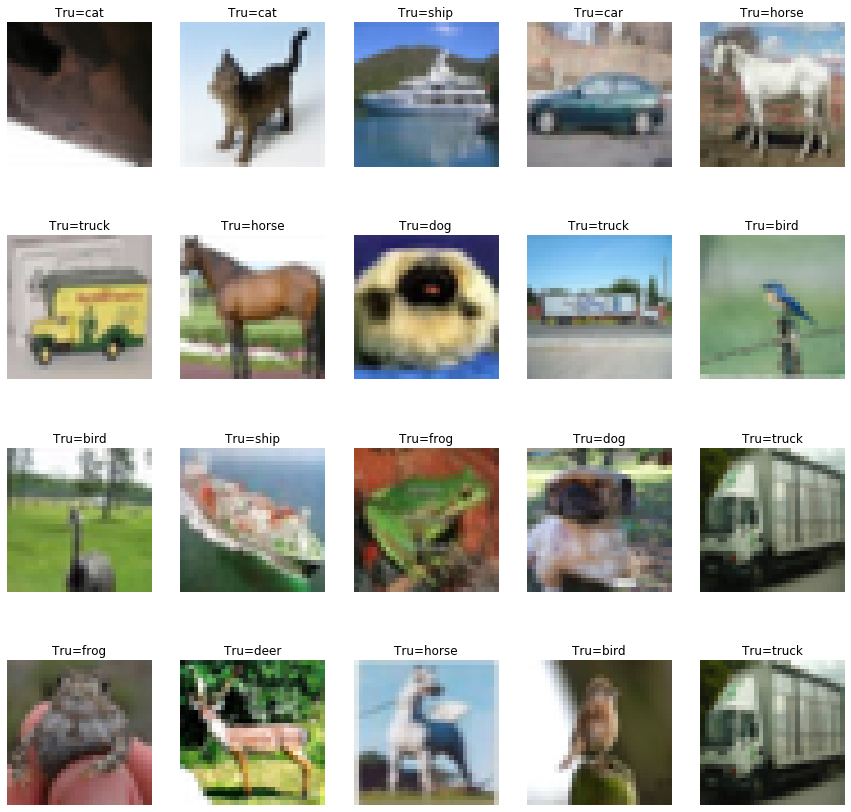

In [3]:
train_transforms = transforms.Compose([
                    transforms.RandomHorizontalFlip(),          
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                    ])
  
test_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

data=DataUtility.download_CIFAR10(train_transforms,test_transforms)
DataUtility.showLoaderImages(data.train, count=20, classes=data.classes, muSigmaPair=(0.5, 0.5))

## Initialize the network and view the summary

In [5]:
Net().to(Utility.getDevice()).summarize((3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 30, 30]             864
              ReLU-2           [-1, 32, 30, 30]               0
       BatchNorm2d-3           [-1, 32, 30, 30]              64
            Conv2d-4           [-1, 32, 28, 28]           9,216
              ReLU-5           [-1, 32, 28, 28]               0
       BatchNorm2d-6           [-1, 32, 28, 28]              64
         Dropout2d-7           [-1, 32, 28, 28]               0
         MaxPool2d-8           [-1, 32, 14, 14]               0
            Conv2d-9           [-1, 64, 12, 12]          18,432
             ReLU-10           [-1, 64, 12, 12]               0
      BatchNorm2d-11           [-1, 64, 12, 12]             128
        Dropout2d-12           [-1, 64, 12, 12]               0
           Conv2d-13           [-1, 64, 10, 10]          36,864
             ReLU-14           [-1, 64,

/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/CIFAR10Net.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Train the network

In [6]:
net = Net().to(Utility.getDevice())
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)
builder = ModelBuilder(net, data, LossFn(F.nll_loss), optimizer)
result = builder.fit(10)



Epoch: 1


/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/CIFAR10Net.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Train Accuracy: 46.172%, Train Loss: 0.011584279127418995



Test Accuracy: 56.07%, Test Loss: 0.00960367638617754


Epoch: 2



Train Accuracy: 59.81%, Train Loss: 0.008788551203906536



Test Accuracy: 65.96%, Test Loss: 0.007562169339507818


Epoch: 3



Train Accuracy: 64.68%, Train Loss: 0.0077681029215455055



Test Accuracy: 69.82%, Test Loss: 0.006859435234218836


Epoch: 4



Train Accuracy: 67.98%, Train Loss: 0.007123931311070919



Test Accuracy: 71.45%, Test Loss: 0.006514021195471287


Epoch: 5



Train Accuracy: 69.992%, Train Loss: 0.00668124807998538



Test Accuracy: 72.4%, Test Loss: 0.006274654064327478


Epoch: 6



Train Accuracy: 71.41%, Train Loss: 0.006370370276272297



Test Accuracy: 74.7%, Test Loss: 0.005729048978537321


Epoch: 7



Train Accuracy: 72.55%, Train Loss: 0.006088456138968468



Test Accuracy: 75.9%, Test Loss: 0.005487185902893543


Epoch: 8



Train Accuracy: 73.886%, Train Loss: 0.0058616879396140575



Test Accuracy: 76.63%, Test Loss: 0.00529410969465971


Epoch: 9



Train Accuracy: 74.474%, Train Loss: 0.00569747993722558



Test Accuracy: 77.53%, Test Loss: 0.005122134927660227


Epoch: 10



Train Accuracy: 75.172%, Train Loss: 0.005552750080823898



Test Accuracy: 78.34%, Test Loss: 0.005027981009334326


## Plot metrics and loss

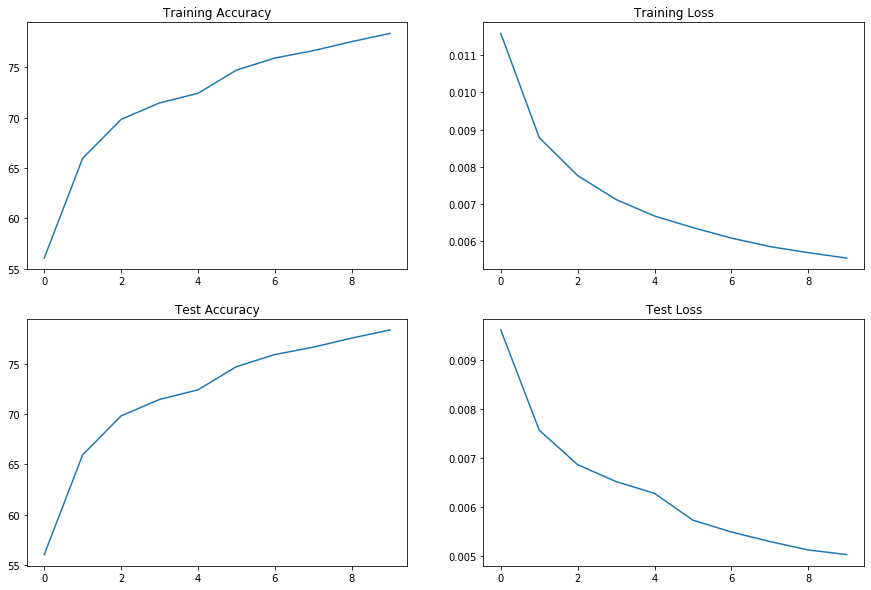

In [7]:
MetricsUtility.plotMetrics(result)

## View miss classified images

/content/drive/My Drive/Colab Notebooks/workspace/cnn-lib/CIFAR10Net.py:65: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



[[797  12  44  20  18   1   7   7  66  28]
 [ 15 851   5   9   2   8  15   2  20  73]
 [ 52   0 648  75  78  55  58  16   8  10]
 [ 11   3  54 640  56 138  62  22   7   7]
 [ 12   0  35  47 797  17  53  30   7   2]
 [  8   2  30 179  44 685  17  33   1   1]
 [  5   1  26  73  18   8 858   4   4   3]
 [ 11   0  11  47  59  52   8 808   0   4]
 [ 44  14  10  16   2   6   2   3 884  19]
 [ 18  37   5   9   4   2   8  11  26 880]]


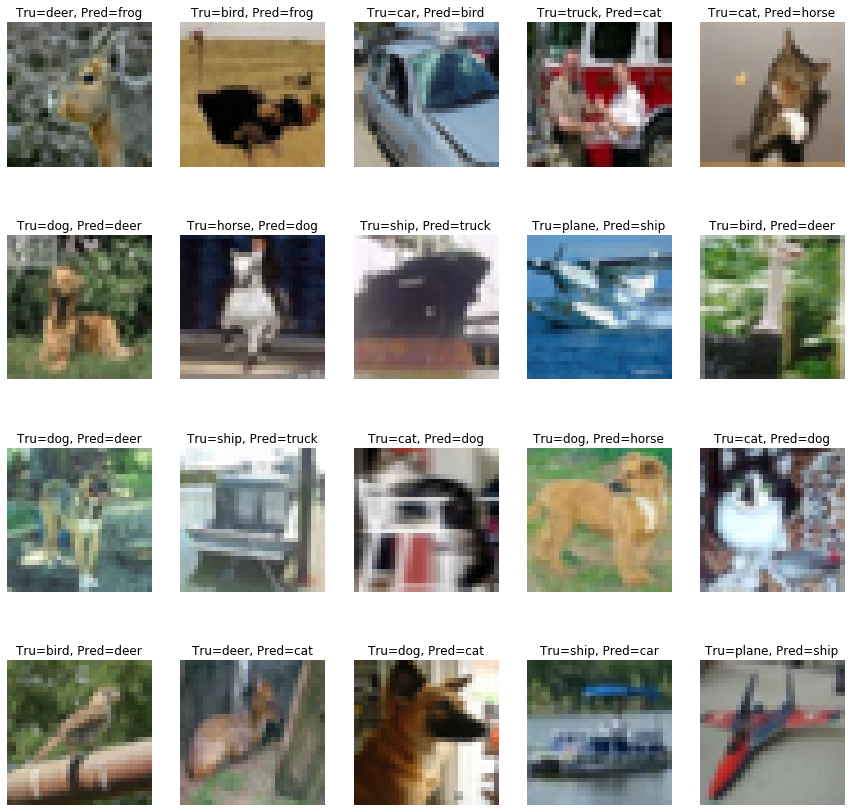

In [8]:
cpu = torch.device("cpu")
testResult = ModelTester().test(net, data.test, LossFn(F.nll_loss))
metrics = MetricsUtility.computeMetrics(testResult.data, testResult.predictions, testResult.targets)
DataUtility.showRandomImages(metrics.miss_classified_data.to(cpu), metrics.miss_classified_targets.to(cpu), metrics.miss_classified_predictions.to(cpu), data.classes, muSigmaPair=(0.5, 0.5))